In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
data=open('E:\华为大数据课程\\test\loan.csv',encoding='utf-8')
loan_data=pd.read_csv(data)
loan_data.head()

,1077501,1296599,5000,5000.1,4975,36 months,10.65,162.87,B,B2,...,0.4,0.5,0.6,15-Jan,171.62,Unnamed: 44,16-Jan,0.7,Unnamed: 47,1.1
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1
1,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,14-Jun,649.91,NaN,16-Jan,0.0,NaN,1
2,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,15-Jan,357.48,NaN,15-Jan,0.0,NaN,1
3,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0.0,NaN,1
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,0.00,0.00,15-Jan,161.03,NaN,15-Sep,0.0,NaN,1


In [8]:
#iloc位置索引，loc列名索引
loan=loan_data.iloc[:5000,:]

(5000, 49)

In [10]:
col=list(range(49))
loan.columns=col
loan.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1
1,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,14-Jun,649.91,NaN,16-Jan,0.0,NaN,1
2,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,15-Jan,357.48,NaN,15-Jan,0.0,NaN,1
3,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0.0,NaN,1
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,0.00,0.00,15-Jan,161.03,NaN,15-Sep,0.0,NaN,1


In [12]:
#查看数据缺失比例，ascending表示是否升序
check_null=loan.isnull().sum().sort_values(ascending=False)/float(len(loan))
#series 也可以用[搜查条件]
print(type(check_null),check_null[check_null>0.2])

<class 'pandas.core.series.Series'> 47    1.0000
26    0.9682
44    0.8998
25    0.6942
dtype: float64


In [13]:
thresh_count=len(loan)*0.9
#删除缺失比例大于阀值的列，dropna方法，thresh参数
loan=loan.dropna(thresh=thresh_count,axis=1)
print(loan.shape)

(5000, 45)


In [14]:
loan.to_csv('E:\华为大数据课程\\test\loan2007_2015.csv',index=False)#忽略首行列头

In [17]:
data_train=open('E:\华为大数据课程\\test\loan2007_2015.csv',encoding='utf-8')
loans=pd.read_csv(data_train)
print(loans.dtypes.value_counts())
print(loans.shape)

float64    22
object     17
int64       6
dtype: int64
(5000, 45)


步骤六 同值处理

In [18]:
#nunique一列中不同值的个数
loans=loans.loc[:,loans.apply(pd.Series.nunique)!=1]
print(loans.shape)

(5000, 41)


步骤七 缺失值处理-分类变量

In [19]:
#获取一个种类数据的所有特征列
objectColumns=loans.select_dtypes(include=['object']).columns
#逐一输出这个种类数据的各特征缺失值情况
print(loans[objectColumns].isnull().sum().sort_values(ascending=False))

10    177
42      6
45      0
23      0
20      0
19      0
18      0
17      0
15      0
14      0
13      0
11      0
9       0
8       0
5       0
dtype: int64


步骤8 调用Missingno库来快速评价数值缺失情况，字符串类型需要先进行数据转换

In [22]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

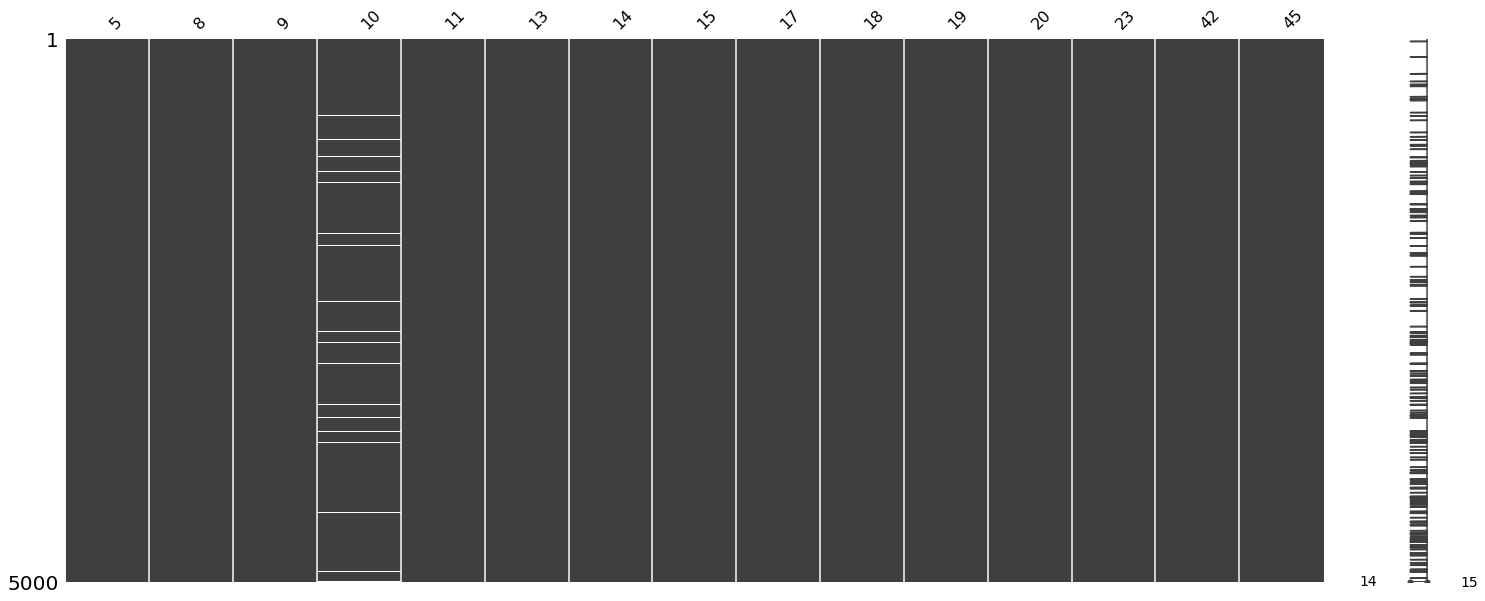

In [23]:
msno.matrix(loans[objectColumns])
plt.show()

可以看出第十列缺失值较多，这里先用‘unknown’代替

In [24]:
objectColumns=loans.select_dtypes(include=['object']).columns
loans[objectColumns]=loans[objectColumns].fillna('Unknown')

In [25]:
#选取数值变量列
numColumns=loans.select_dtypes(include=[np.number]).columns
pd.set_option('display.max_columns',len(numColumns))
loans[numColumns].tail()

,0,1,2,3,4,6,7,12,21,22,24,27,28,29,30,31,33,34,35,36,37,38,39,40,41,43
4995,994103,1218303,7200,7200,7200.0,7.90,225.29,72000.0,18.50,0.0,1.0,12.0,0.0,26692,63.3,25.0,0.0,0.0,8110.230042,8110.23,7200.0,910.23,0.0,0.0,0.0,229.94
4996,993885,1218488,8000,8000,8000.0,6.03,243.49,85200.0,9.49,0.0,0.0,9.0,0.0,0,0.0,30.0,0.0,0.0,8753.973604,8753.97,8000.0,753.97,0.0,0.0,0.0,1581.86
4997,994123,1218525,24000,24000,24000.0,19.03,880.11,85000.0,13.13,0.0,0.0,12.0,0.0,23311,78.8,24.0,0.0,0.0,30605.817540,30605.82,24000.0,6605.82,0.0,0.0,0.0,1495.11
4998,994096,1218296,2000,2000,2000.0,12.69,67.09,38400.0,21.06,0.0,1.0,11.0,0.0,620,10.2,23.0,0.0,0.0,2413.792479,2413.79,2000.0,413.79,0.0,0.0,0.0,72.39
4999,993964,1218153,7000,7000,7000.0,6.62,214.93,48000.0,16.00,0.0,0.0,14.0,0.0,22301,80.9,25.0,0.0,0.0,7736.092664,7736.09,7000.0,736.09,0.0,0.0,0.0,223.80


In [27]:
#对于数值列，采用sklearn 的processing模块，进行均值填充
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
#verbose=0针对列来处理
imr=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imr=imr.fit(loans[numColumns])
loans[numColumns]=imr.transform(loans[numColumns])
msno.matrix(loans[numColumns])#缺失值可视化
plt.show()

ModuleNotFoundError: No module named 'sklearn.impute'

根据属性列直接过滤掉对预测模型没有实际意义的属性

In [ ]:
#设置过滤属性列
drop_list=[]
loans.drop(drop_list,axis=1,inplace=True)

步骤11 特征衍生

In [ ]:
loans['新特征']=loans['']/((loans[]+1)/12)

In [28]:
objectColumns=loans.select_dtypes(include=['object']).columns
pd.set_option('display.max_columns',len(objectColumns))
loans[objectColumns].tail()

,5,8,9,10,11,13,14,15,17,18,19,20,23,42,45
4995,36 months,A,A4,Unknown,MORTGAGE,Verified,10/1,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,other,天津,CT,Dec-91,14-Nov,16-Jan
4996,36 months,A,A1,10+ years,MORTGAGE,Not Verified,10/1,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,other,宁夏,TX,Apr-94,14-May,14-Jun
4997,36 months,E,E2,< 1 year,MORTGAGE,Verified,10/1,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,上海,OH,Sep-00,14-May,16-Jan
4998,36 months,B,B5,10+ years,RENT,Not Verified,10/1,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,other,贵州,TX,Apr-99,14-Nov,15-Sep
4999,36 months,A,A2,10+ years,MORTGAGE,Source Verified,10/1,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,云南,PA,Dec-77,14-Nov,14-Oct


In [32]:
loans['15'].nunique()

7

步骤12 特征抽象，即对特征进行编码

In [ ]:
def coding(col,codeDict):
    colCoded=pd.Series(col,copy=True)
    for key,value in codeDict.items():
        colCoded.replace(key,value,inplace=True)
    return colCoded
#贷款状态loanStatus 编码为违约=1，正常=0
loans['15']=coding(loans['15'],{})
pd.value_counts(loans['15'])

步骤13 对部分数值特征进行抽象化

In [ ]:
mapping_dict={{'emp_length':'10 years+':10,'9 years':9,...,'< 1 years':0,'Unknown':0},'grade':{'A':1,'B':2}}
loans=loans.replace(mapping_dict)

步骤14 剩余特征进行独热碼

In [ ]:
n_columns=['','',..,'']
dummy_df=pd.get_dummies(loans[n_columns])#get_dummies进行独热碼
loans=pd.concat([loans,dummy_df],axis=1)#axis=1 列对齐

步骤15 清楚原来的属性

In [ ]:
loans=loans.drop(n_columns,axis=1)
col=loans.select_dtypes(include=['int64','float64']).columns
col=col.drop('loan_status')
col=col.drop('id')
loans_ml_df=loans#复制数据至变量loans_ml_df

步骤16 特征缩放

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#数据标准化
loans_ml_df[col]=sc.fit_transform(loans_ml_df[col])

步骤17 特征选择 首先通过RFE递归消除法选出相关性比较高的30个特征，然后通过随机森林判断属性重要性

步骤18 不平衡数据的处理（过采样，样本生成，随机森林可以设置样本权重）

In [ ]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    #从数据集中取出数据和标签，并划分数据训练集和测试集
    x_features=x.ix[:,x.columns!='loan_status']
    x_labels=x.ix[:,x.columns=='loan_status']
    x_features_train,x_features_test,x_labels_train,x_labels_test=train_test_split(x_features,x_labels,test_size=0.3)
    return (x_features_train,x_features_test,x_labels_train,x_labels_test)
x=loans_ml_df[col_new]
y=loans_ml_df['loans_status']
df=loans_ml_df
data_train_x,data_test_x,data_train_y,data_test_y=data_prepration(df)
print(pd.value_counts(data_test_y['loans_status']))
print(pd.value_counts(data_train_y['loans_status']))

调用SMOTE算法进行倾斜数据的平衡化处理

In [33]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
os_data_x,os_data_y=os.fit_sample(data.train_x.values,data_train_y.values.ravel())
columns=data_train_x.columns
os_data_x=pd.DataFrame(data=os_data_x,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['loan_status'])
newtraindata.set_index('id',inplace=True)
newtestdata=pd.concat([os_test_x,os_test_y],axis=1)
newtestdata.set_index('id',inplace=True)
#将处理好的数据保存
newtraindata.to_csv('',sep=',')
newtestdata.to_csv('',sep=',')
print('结束')

ModuleNotFoundError: No module named 'imblearn'

上述过程完成数据的预处理与分析，得到了少数据集下数据分析比较好的模型参数。为后续基于大数据的数据挖掘和建模准备了条件

In [ ]:
#对于风险评估模型，欺诈模型，一定要进行数据去不平衡化处理，因为数据中正常样本会远远大于异常样本。